In [2]:
!pip install pandas
!pip install openpyxl
!pip install imbalanced-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Replace 'path_to_your_excel_file.xlsx' with the path to your Excel file
file_path = 'DatasetRV1.xlsx'
data = pd.read_excel(file_path)

  Using cached openpyxl-3.1.4-py2.py3-none-any.whl (251 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
  Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)


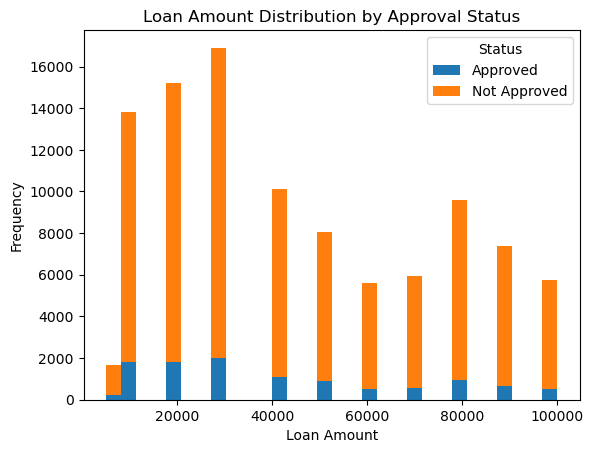

In [3]:
# Separate data by approval status for stacked histogram
approved = data[data['Approved'] == 1]['Loan_Amount']
not_approved = data[data['Approved'] == 0]['Loan_Amount']

labels = ['Approved', 'Not Approved']
colors = ['#1f77b4', '#ff7f0e']  # Default seaborn color palette for distinction

plt.hist([approved, not_approved], bins=30, stacked=True, color=colors, label=labels)
plt.title('Loan Amount Distribution by Approval Status')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.legend(title='Status')
plt.show()

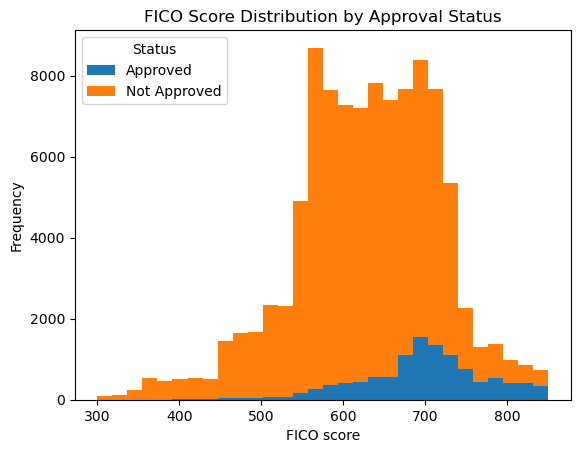

In [4]:
# Separate data by approval status for stacked histogram
approved_scores = data[data['Approved'] == 1]['FICO_score']
not_approved_scores = data[data['Approved'] == 0]['FICO_score']

labels = ['Approved', 'Not Approved']
colors = ['#1f77b4', '#ff7f0e']  # Default seaborn color palette for distinction

plt.hist([approved_scores, not_approved_scores], bins=30, stacked=True, color=colors, label=labels)
plt.title('FICO Score Distribution by Approval Status')
plt.xlabel('FICO score')
plt.ylabel('Frequency')
plt.legend(title='Status')
plt.show()

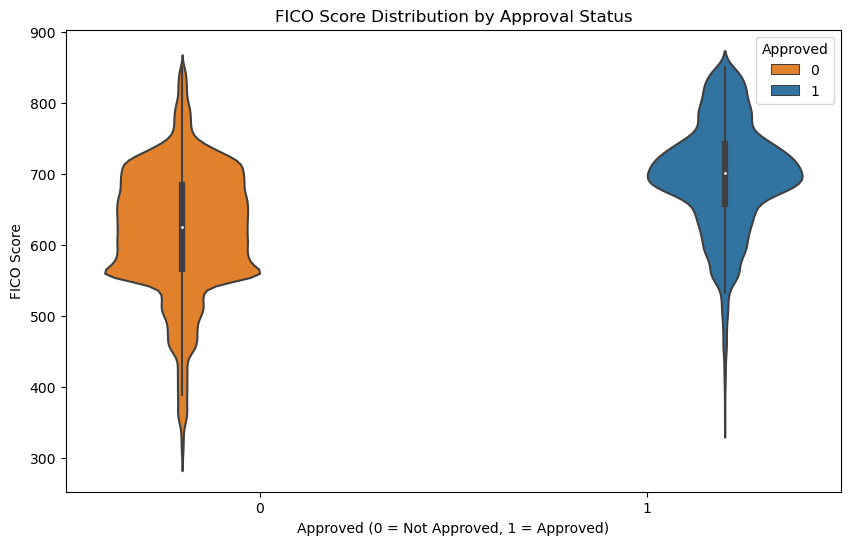

In [5]:
# Define colors explicitly with reversed choices
color_palette = {'0': '#ff7f0e', '1': '#1f77b4'}  # Assuming 0: Not Approved, 1: Approved

# Convert the 'Approved' column to strings to match the palette keys
data['Approved'] = data['Approved'].astype(str)

# Violinplot with adjusted color palette
plt.figure(figsize=(10, 6))
sns.violinplot(x='Approved', y='FICO_score', data=data, hue='Approved', palette=color_palette, legend=False)
plt.title('FICO Score Distribution by Approval Status')
plt.xlabel('Approved (0 = Not Approved, 1 = Approved)')
plt.ylabel('FICO Score')
plt.show()

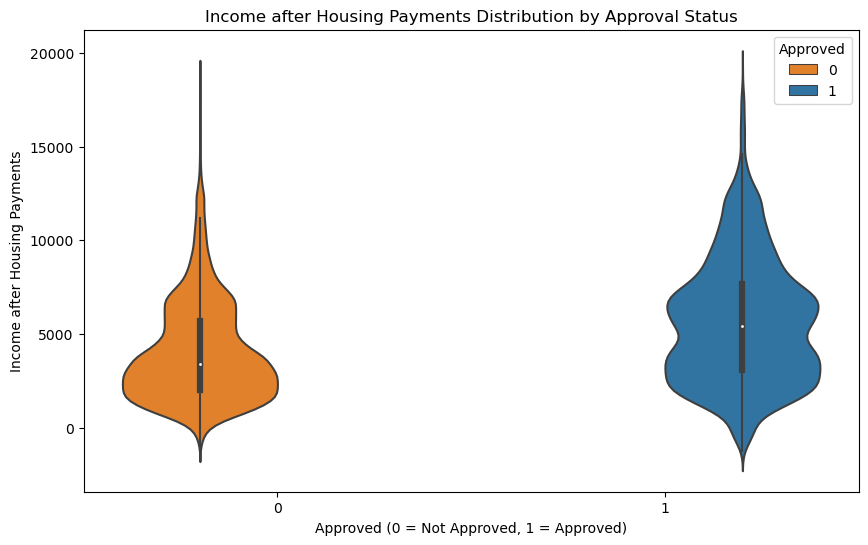

In [6]:
# Define colors explicitly with reversed choices
color_palette = {'0': '#ff7f0e', '1': '#1f77b4'}  # Assuming 0: Not Approved, 1: Approved

# Convert the 'Approved' column to strings to match the palette keys
data['Approved'] = data['Approved'].astype(str)

# Violinplot with adjusted color palette
plt.figure(figsize=(10, 6))
sns.violinplot(x='Approved', y='Income after Housing Payments', data=data, hue='Approved', palette=color_palette, legend=False)
plt.title('Income after Housing Payments Distribution by Approval Status')
plt.xlabel('Approved (0 = Not Approved, 1 = Approved)')
plt.ylabel('Income after Housing Payments')
plt.show()

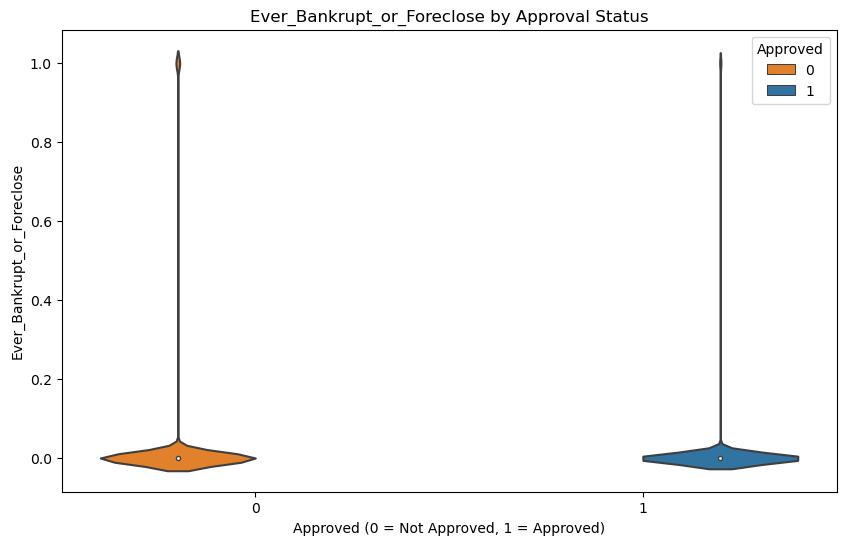

In [7]:
# Define colors explicitly with reversed choices
color_palette = {'0': '#ff7f0e', '1': '#1f77b4'}  # Assuming 0: Not Approved, 1: Approved

# Convert the 'Approved' column to strings to match the palette keys
data['Approved'] = data['Approved'].astype(str)

# Violinplot with adjusted color palette
plt.figure(figsize=(10, 6))
sns.violinplot(x='Approved', y='Ever_Bankrupt_or_Foreclose', data=data, hue='Approved', palette=color_palette, legend=False)
plt.title('Ever_Bankrupt_or_Foreclose by Approval Status')
plt.xlabel('Approved (0 = Not Approved, 1 = Approved)')
plt.ylabel('Ever_Bankrupt_or_Foreclose')
plt.show()

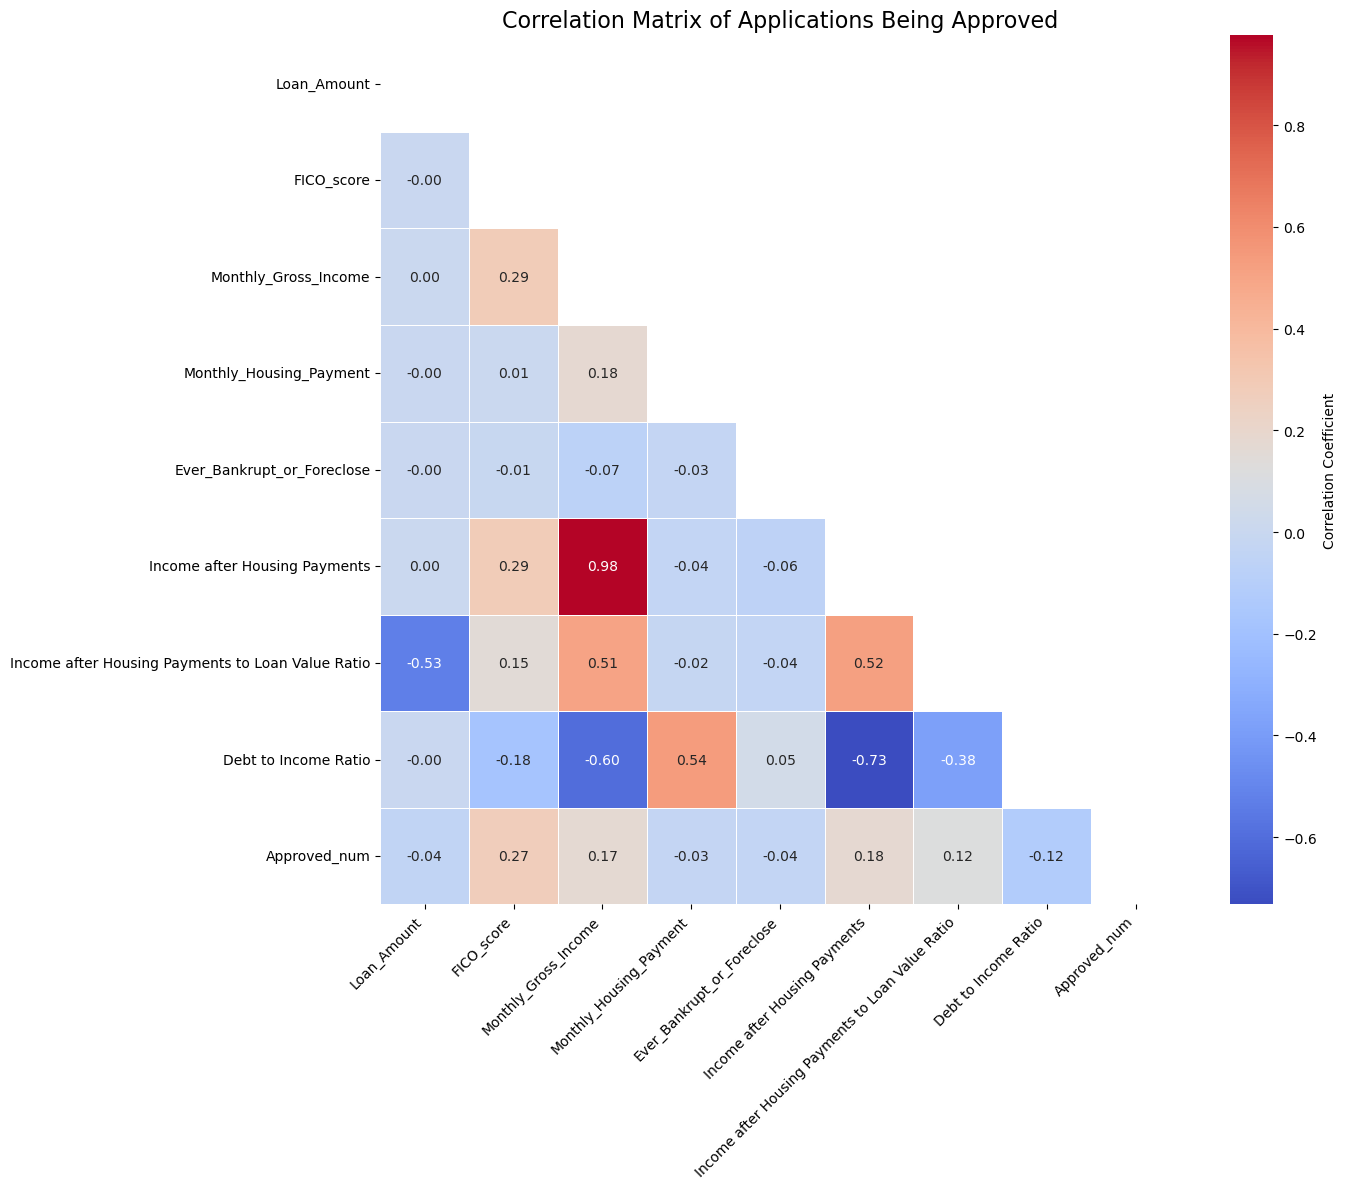

In [8]:
# Filter out only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])  # This ensures only numeric columns are included

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Filter out only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])  # Ensures only numeric columns are included

# Remove specified columns that are non-numeric or not needed for correlation analysis
matrixdata = data.drop(columns=['User ID', 'bounty', 'applications'])

# Ensure 'Approved' is numeric
matrixdata['Approved_num'] = matrixdata['Approved'].astype(int)
                                                           
# Select only numeric columns again including the newly converted 'Approved'
numeric_data = matrixdata.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={'label': 'Correlation Coefficient'}, linewidths=.5)
plt.xticks(rotation=45, ha='right')  # Adjust label alignment
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Applications Being Approved', fontsize=16)
plt.tight_layout()
plt.show()

In [9]:
# Separate the dataset by Lender
lender_A_data = matrixdata[matrixdata['Lender'] == 'A']
lender_B_data = matrixdata[matrixdata['Lender'] == 'B']
lender_C_data = matrixdata[matrixdata['Lender'] == 'C']

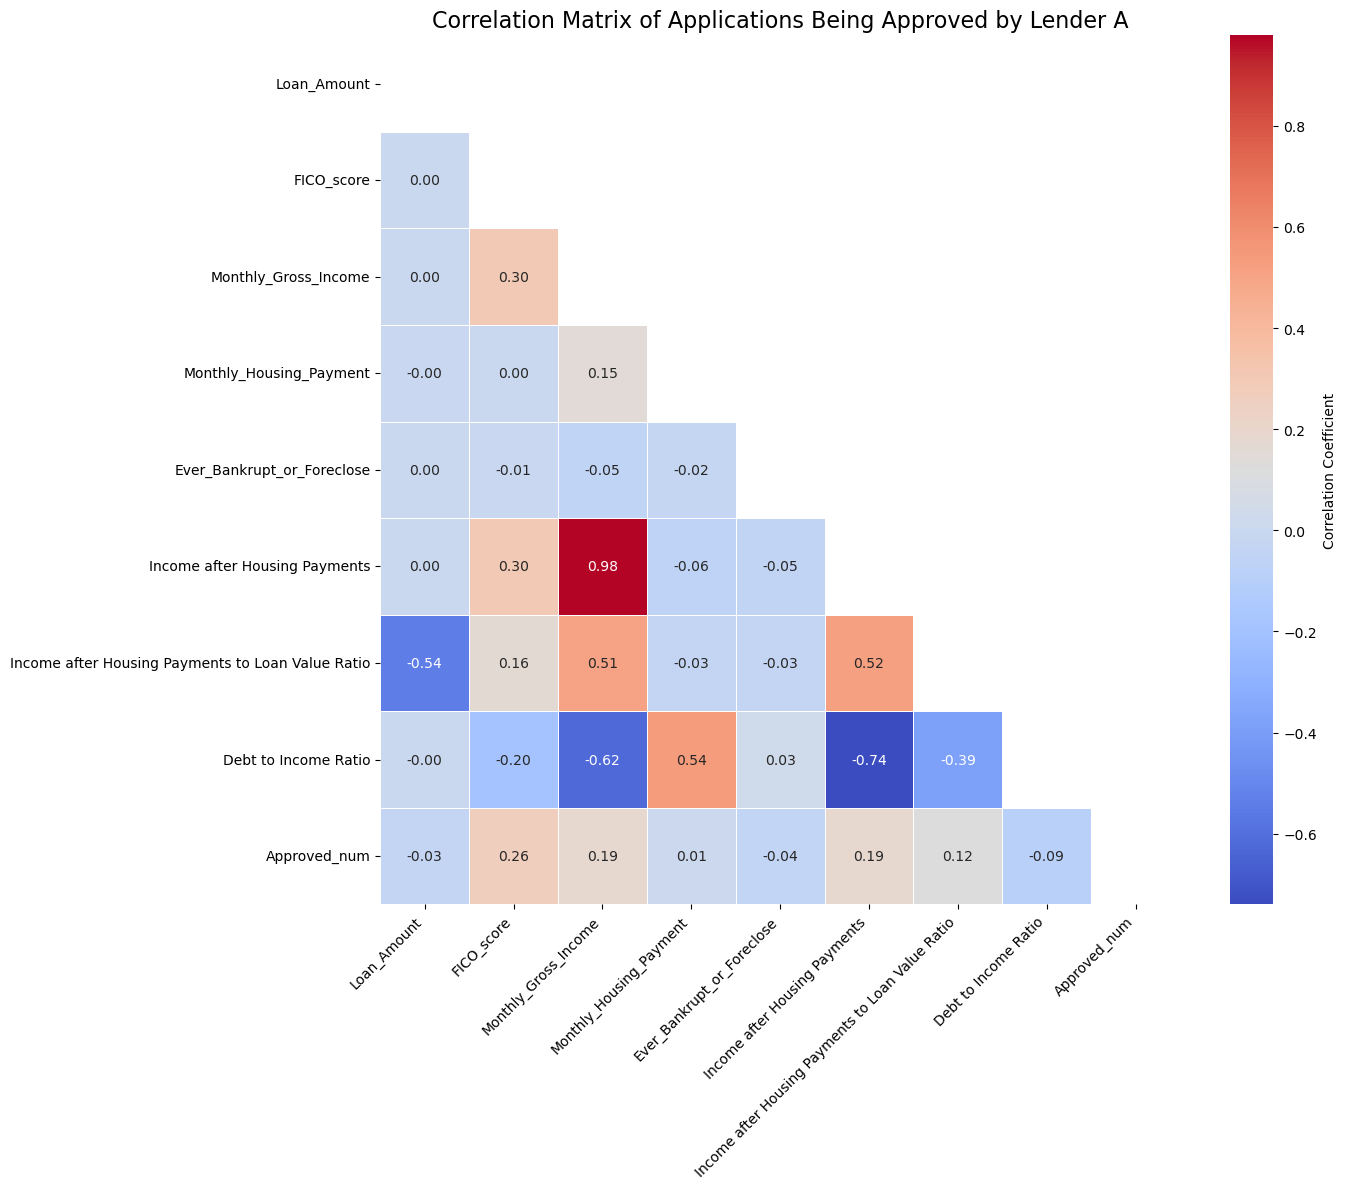

In [10]:
# Select only numeric columns again including the newly converted 'Approved'
lender_A_numeric_data = lender_A_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix_A = lender_A_numeric_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix_A, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix_A, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={'label': 'Correlation Coefficient'}, linewidths=.5)
plt.xticks(rotation=45, ha='right')  # Adjust label alignment
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Applications Being Approved by Lender A', fontsize=16)
plt.tight_layout()
plt.show()

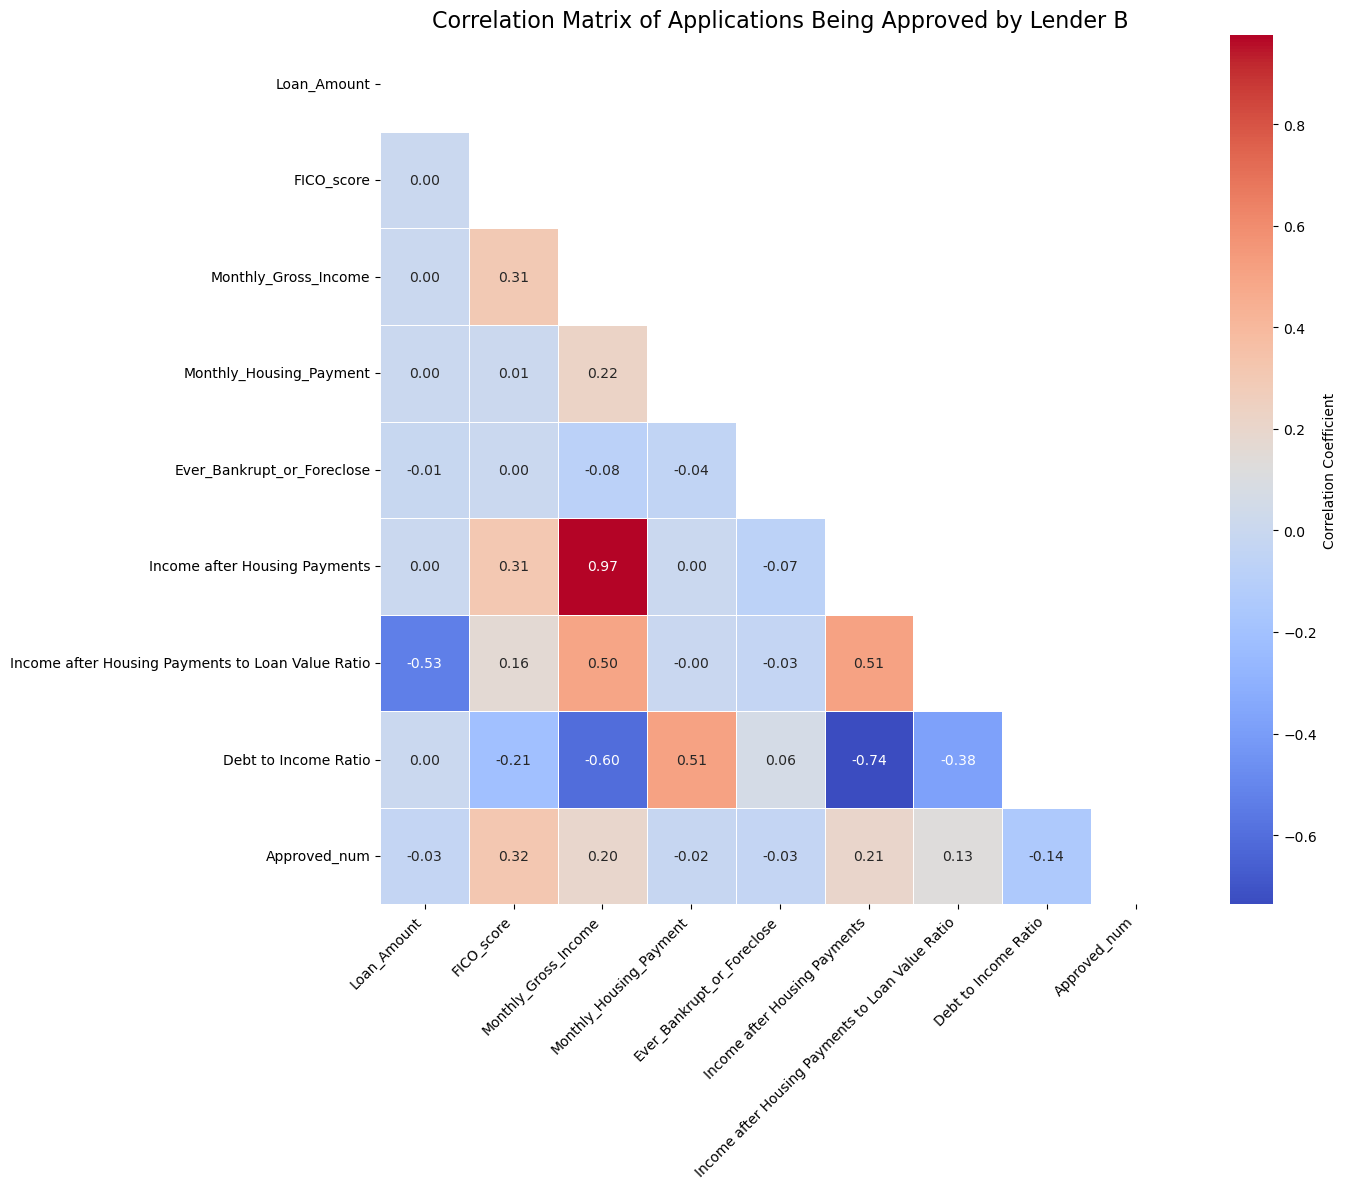

In [11]:
# Select only numeric columns again including the newly converted 'Approved'
lender_B_numeric_data = lender_B_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix_B = lender_B_numeric_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix_B, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix_B, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={'label': 'Correlation Coefficient'}, linewidths=.5)
plt.xticks(rotation=45, ha='right')  # Adjust label alignment
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Applications Being Approved by Lender B', fontsize=16)
plt.tight_layout()
plt.show()

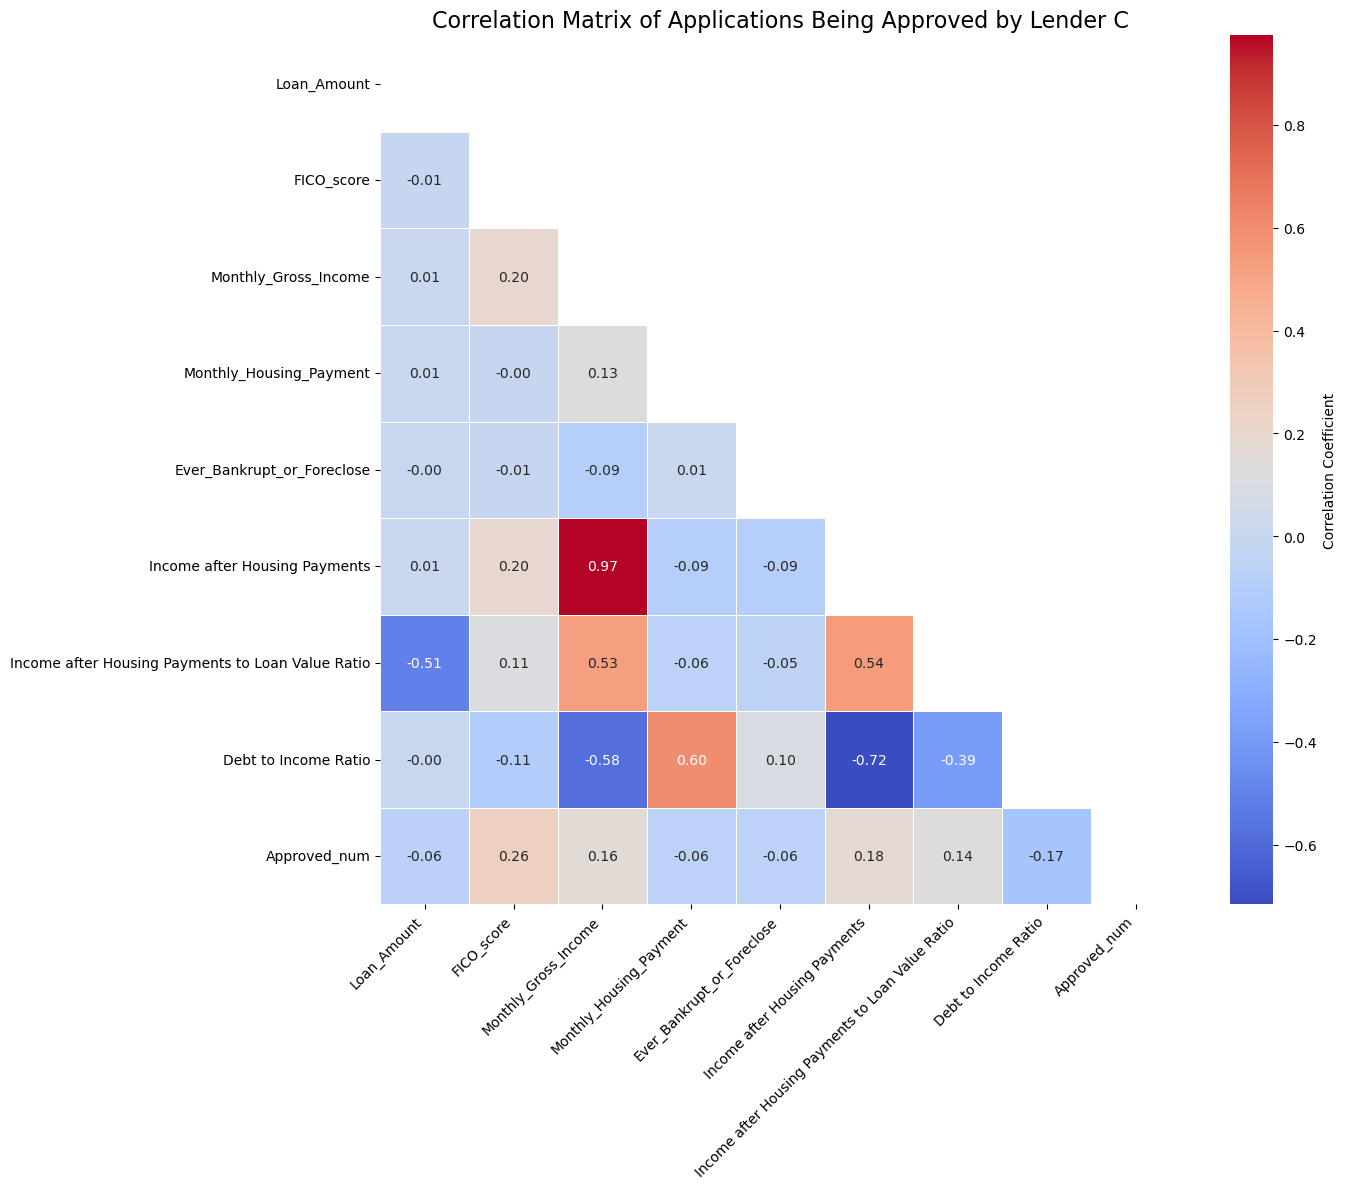

In [12]:
# Select only numeric columns again including the newly converted 'Approved'
lender_C_numeric_data = lender_C_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix_C = lender_C_numeric_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix_C, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix_C, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={'label': 'Correlation Coefficient'}, linewidths=.5)
plt.xticks(rotation=45, ha='right')  # Adjust label alignment
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Applications Being Approved by Lender C', fontsize=16)
plt.tight_layout()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame after initial cleanup
# Remove specified columns that are non-numeric or not needed for correlation analysis
matrixdata = data.drop(columns=['User ID', 'bounty', 'applications'])

# Ensure 'Approved' is numeric
matrixdata['Approved_num'] = matrixdata['Approved'].astype(int)

# Convert categorical data to numeric if not already done
matrixdata = pd.get_dummies(matrixdata)

# Select only numeric columns again including the newly converted 'Approved'
numeric_data = matrixdata.select_dtypes(include=[np.number])

# Assuming 'Lender' is the column with lender names and needs to be encoded
columns_to_encode = ['Reason', 'Fico_Score_group', 'Employment_Status', 'Employment_Sector', 'Lender']
data_encoded = pd.get_dummies(data, columns=columns_to_encode, drop_first=True)

# Split the data into features and target variable
X = numeric_data.drop('Approved_num', axis=1)  # Features
y = numeric_data['Approved_num']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optionally, display the coefficients of the model to interpret the influence of each feature
coefficients = pd.DataFrame(model.coef_.flatten(), index=X.columns, columns=['Coefficient'])
print(coefficients)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     26750
           1       0.48      0.06      0.11      3250

    accuracy                           0.89     30000
   macro avg       0.69      0.53      0.53     30000
weighted avg       0.85      0.89      0.85     30000

Confusion Matrix:
[[26537   213]
 [ 3052   198]]
                                                   Coefficient
Loan_Amount                                          -0.000006
FICO_score                                            0.011115
Monthly_Gross_Income                                 -0.000021
Monthly_Housing_Payment                              -0.000126
Ever_Bankrupt_or_Foreclose                           -0.989967
Income after Housing Payments                         0.000105
Income after Housing Payments to Loan Value Ratio    -0.084631
Debt to Income Ratio                                 -0.255156


In [14]:
# Assuming 'Lender' is the column with lender names and needs to be encoded
columns_to_encode = ['Reason', 'Fico_Score_group', 'Employment_Status', 'Employment_Sector', 'Lender']
data_encoded = pd.get_dummies(data, columns=columns_to_encode, drop_first=True)

# Split the data into features and target variable
X = matrixdata.drop('Approved_num', axis=1)  # Features
y = matrixdata['Approved_num']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display model coefficients for interpretation
coefficients = pd.DataFrame(model.coef_.flatten(), index=X.columns, columns=['Coefficient'])
print(coefficients)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26750
           1       1.00      1.00      1.00      3250

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

Confusion Matrix:
[[26750     0]
 [    0  3250]]
                                                   Coefficient
Loan_Amount                                          -0.000004
FICO_score                                            0.000777
Monthly_Gross_Income                                 -0.000006
Monthly_Housing_Payment                              -0.000036
Ever_Bankrupt_or_Foreclose                           -0.128905
Income after Housing Payments                         0.000029
Income after Housing Payments to Loan Value Ratio    -0.120478
Debt to Income Ratio                                 -0.129514
Reason_cover_an_unexpected_cost   

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Remove specified columns that are non-numeric or not needed for correlation analysis
matrixdata = data.drop(columns=['User ID', 'bounty', 'applications'])

# Ensure 'Approved' is numeric
matrixdata['Approved_num'] = matrixdata['Approved'].astype(int)

# Convert categorical data to numeric if not already done
matrixdata = pd.get_dummies(matrixdata)

# Select only numeric columns again including the newly converted 'Approved'
numeric_data = matrixdata.select_dtypes(include=[np.number])

# Split the data into features and target variable
X = lender_A_numeric_data.drop('Approved_num', axis=1)  # Features
y = lender_A_numeric_data['Approved_num']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optionally, display the coefficients of the model to interpret the influence of each feature
coefficients = pd.DataFrame(model.coef_.flatten(), index=X.columns, columns=['Coefficient'])
print(coefficients)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     14686
           1       0.46      0.06      0.10      1814

    accuracy                           0.89     16500
   macro avg       0.68      0.52      0.52     16500
weighted avg       0.85      0.89      0.85     16500

Confusion Matrix:
[[14567   119]
 [ 1712   102]]
                                                   Coefficient
Loan_Amount                                          -0.000004
FICO_score                                            0.010742
Monthly_Gross_Income                                  0.000018
Monthly_Housing_Payment                              -0.000105
Ever_Bankrupt_or_Foreclose                           -1.364505
Income after Housing Payments                         0.000123
Income after Housing Payments to Loan Value Ratio    -0.008081
Debt to Income Ratio                                  1.157463


In [16]:
# Split the data into features and target variable
X = lender_B_numeric_data.drop('Approved_num', axis=1)  # Features
y = lender_B_numeric_data['Approved_num']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optionally, display the coefficients of the model to interpret the influence of each feature
coefficients = pd.DataFrame(model.coef_.flatten(), index=X.columns, columns=['Coefficient'])
print(coefficients)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7669
           1       0.50      0.15      0.23       581

    accuracy                           0.93      8250
   macro avg       0.72      0.57      0.60      8250
weighted avg       0.91      0.93      0.91      8250

Confusion Matrix:
[[7580   89]
 [ 492   89]]
                                                   Coefficient
Loan_Amount                                          -0.000005
FICO_score                                            0.019184
Monthly_Gross_Income                                  0.000067
Monthly_Housing_Payment                               0.000127
Ever_Bankrupt_or_Foreclose                           -1.889800
Income after Housing Payments                        -0.000061
Income after Housing Payments to Loan Value Ratio     0.079255
Debt to Income Ratio                                 -2.451117


In [17]:
# Split the data into features and target variable
X = lender_C_numeric_data.drop('Approved_num', axis=1)  # Features
y = lender_C_numeric_data['Approved_num']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optionally, display the coefficients of the model to interpret the influence of each feature
coefficients = pd.DataFrame(model.coef_.flatten(), index=X.columns, columns=['Coefficient'])
print(coefficients)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      4362
           1       0.59      0.07      0.12       888

    accuracy                           0.83      5250
   macro avg       0.71      0.53      0.52      5250
weighted avg       0.80      0.83      0.78      5250

Confusion Matrix:
[[4319   43]
 [ 827   61]]
                                                   Coefficient
Loan_Amount                                          -0.000006
FICO_score                                            0.008822
Monthly_Gross_Income                                  0.000075
Monthly_Housing_Payment                               0.000174
Ever_Bankrupt_or_Foreclose                           -0.887685
Income after Housing Payments                        -0.000099
Income after Housing Payments to Loan Value Ratio    -0.012827
Debt to Income Ratio                                 -2.974494
